##CAD_dimensions Radius=10mm
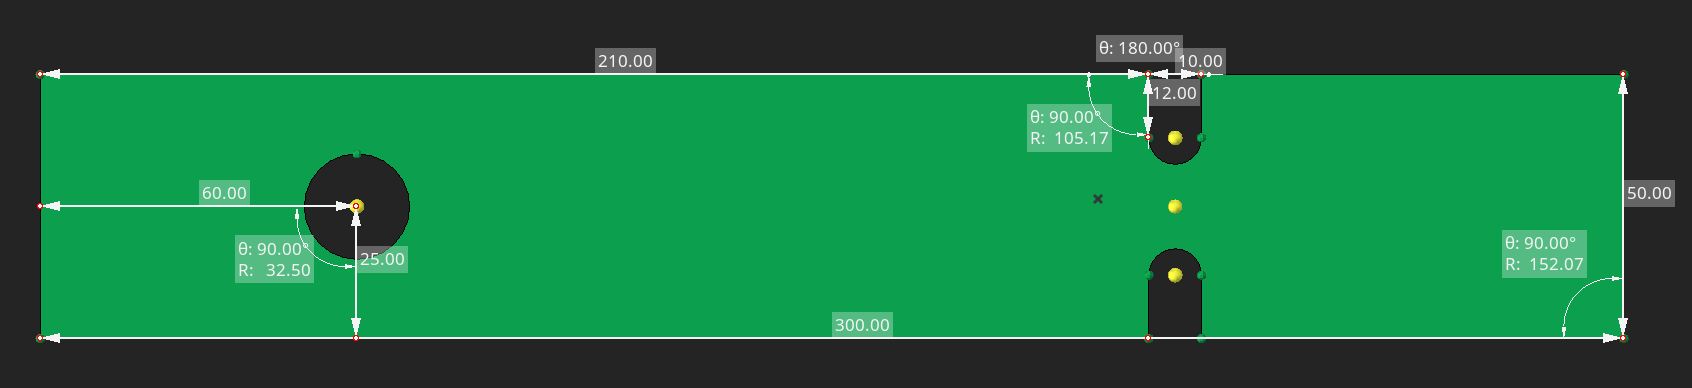

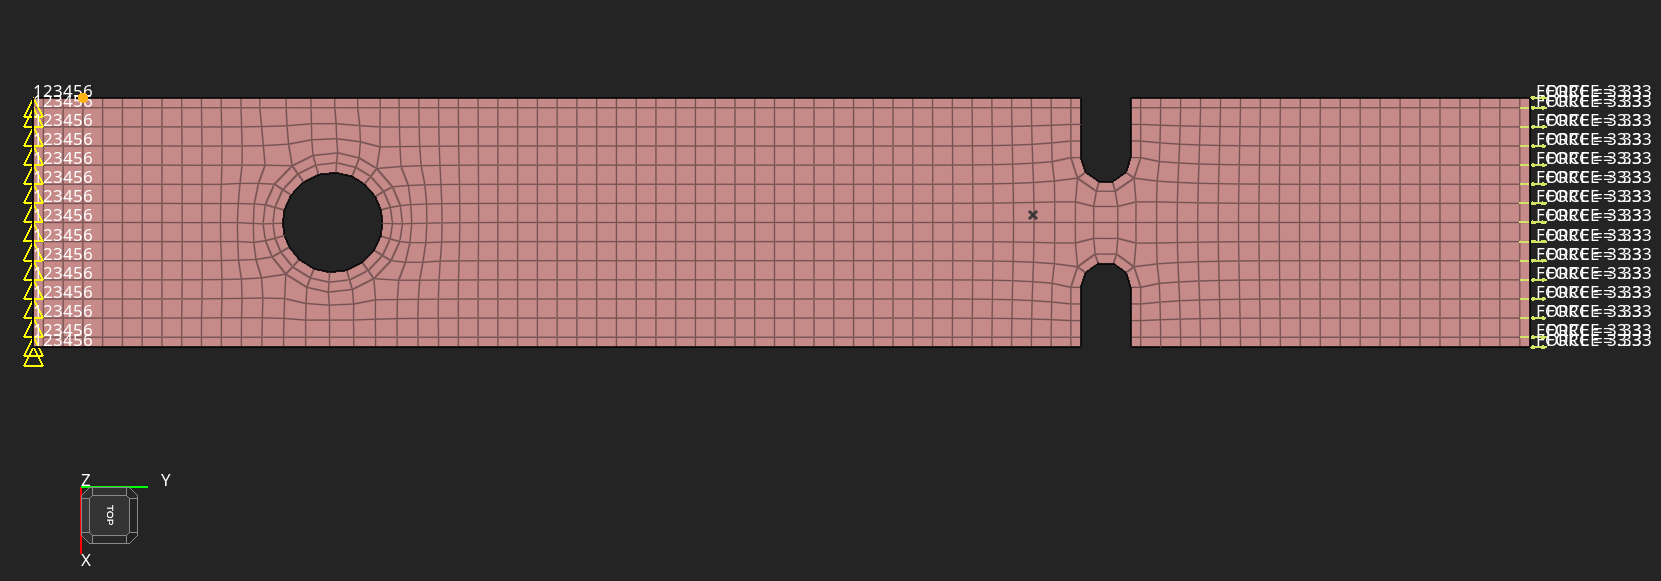

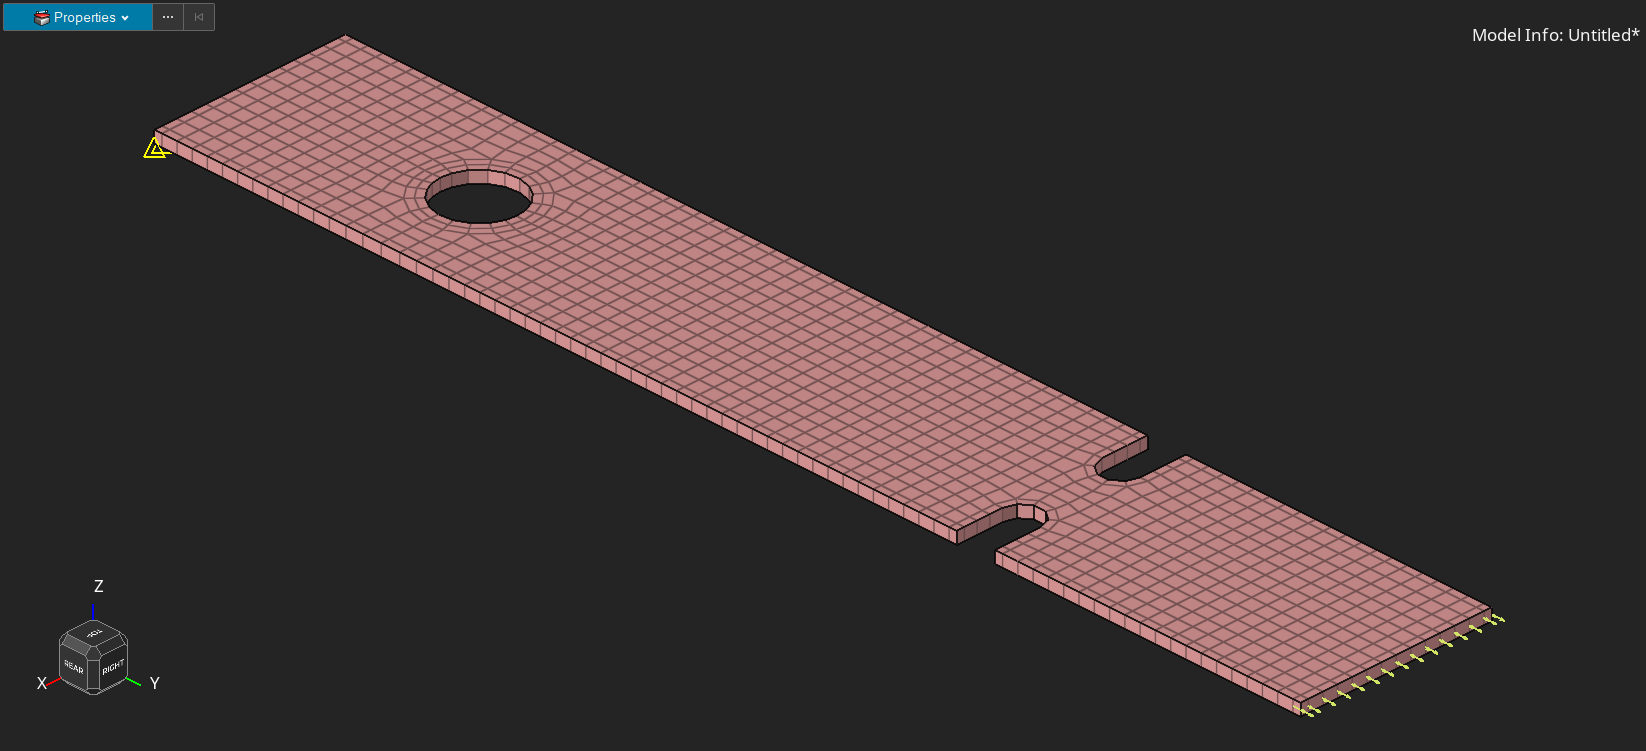

In [1]:
## Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import math
from stl import mesh

In [2]:
## Plate Dimensions in mm
L=300
W=50

#hole
R1=10
R1x=60
R1y=25

#Slot
SL=12 ##slot length
SW=10 ##slot width
SR=5 ##slot radius
Sr1x=215
Sr1y=12
Sr2x=215
Sr2y=38

## Initilize
Grids=[]

In [3]:
## Grid Density
GLD=301
GWD=11

##Create Grids ## 1st half
for x in np.linspace(0,L,GLD):
    if(50<=x<=70):
        y0=math.sqrt(abs((R1**2)-((x-R1x)**2)))
        ys=y0+R1y
                
        for y in np.linspace(ys,50,GWD):
            Grids.append([x,y])
    else:
        for y in np.linspace(25,W,GWD):
            Grids.append([x,y])

## Create grids 2nd half

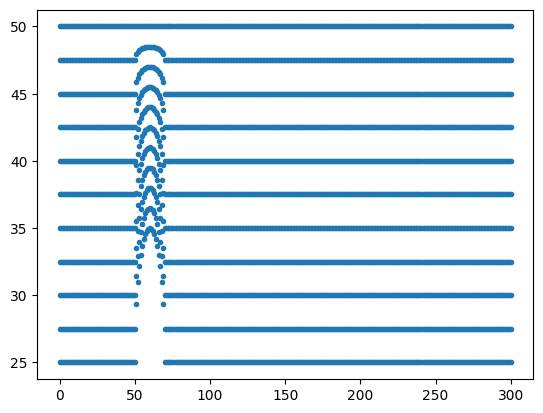

In [4]:
##convert into array
Nodes=np.array(Grids)

##Display Grids
plt.plot(Nodes[:,0],Nodes[:,1],'.')
plt.show()

In [5]:
##Create elements using Delauny
from scipy.spatial import Delaunay
tria=Delaunay(Nodes)

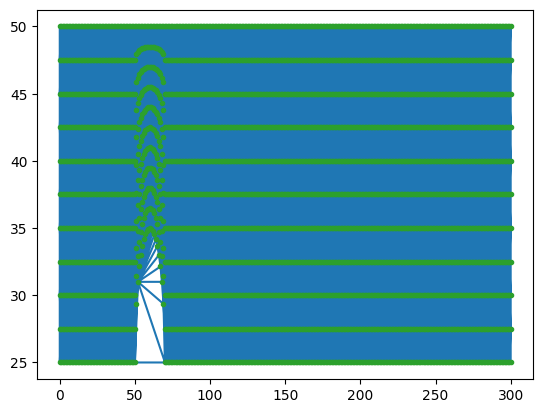

In [6]:
## display Elements
plt.triplot(Nodes[:,0],Nodes[:,1],tria.simplices)
plt.plot(Nodes[:,0],Nodes[:,1],'.')
plt.show()

In [7]:
## collect unwanted elements and delete it
Rr=9.95

randompoints=[]
randompoints.append([55,26])
for x in np.linspace(51,69,100):
    yr=math.sqrt(abs((Rr**2)-((x-R1x)**2)))
    y=yr+R1y
    randompoints.append([x,y])

#for x in np.linspace(50,71,30):
    #for y in np.linspace(0,35,10):
        #randompoints.append([x,y])

rp=tuple(tria.find_simplex(randompoints)) ## unwanted elements Ids

In [8]:
##delete Unwanted elements
mesh_grid=np.delete(tria.simplices,rp,0)

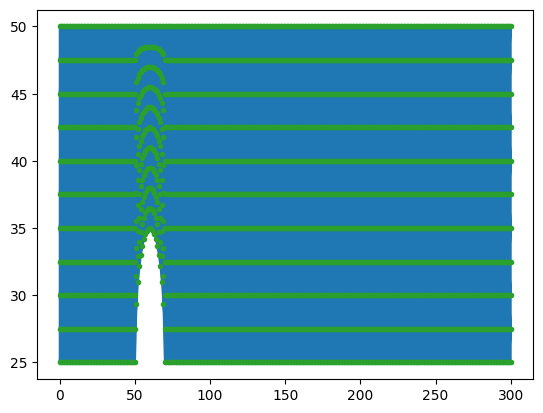

In [9]:
##display after deleting
plt.triplot(Nodes[:,0],Nodes[:,1],mesh_grid)
plt.plot(Nodes[:,0],Nodes[:,1],".")
plt.show()

In [10]:
## add z cordinate in node
for i in Grids:
    i.append(0)


In [11]:
##export as stl
import numpy as np

vertices=np.array(Grids)
plate=mesh.Mesh(np.zeros(mesh_grid.shape[0],dtype=mesh.Mesh.dtype))
for i,m in enumerate(mesh_grid):
    for j in range(3):
        plate.vectors[i][j]=vertices[m[j],:]
plate.save("E:\\h1m.stl")